In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

A graph of 2 nodes:
0:[1]
1:[0]

Nodes: [0, 1]
Edges: [(0, 1)]


/Users/audreyrussell/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


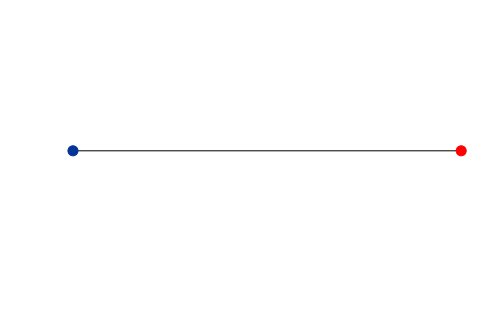

In [2]:
class Graph():
    def __init__(self):
        self.gdict = {}
        self.val = {}
        
    def add_node(self, node, val=0):
        if node not in self.gdict:
            self.gdict[node] = []
        self.val[node] = val
        
    def add_edge(self, node1, node2):  
        '''add edge if not in dict'''
        self.add_node(node1)
        self.add_node(node2)

        if node2 not in self.gdict[node1]:
            self.gdict[node1].append(node2)
        if node1 not in self.gdict[node2]:
            self.gdict[node2].append(node1)
            
            #delete_edge here
    def get_nodes(self):
        """list of nodes"""
        return list(self.gdict.keys())
    
    def get_edges(self):
        """list of edges"""
        out = []
        for node,links in self.gdict.items():
            for link in links:
                if node<link:
                    out.append((node,link))
        return out
            
    def __str__(self):
        out = 'A graph of ' + str(len(self.gdict)) + ' nodes:\n'
        for node in self.gdict:
            out += str(node) + ':' + str(self.gdict[node]) + '\n'
        return out
    
    def plot(self):
        RED = (1,0,0)
        BLUE = (0,0.2,0.6)
        
        g_nx = nx.Graph()
        nodes = self.get_nodes()
        g_nx.add_nodes_from(nodes)
        g_nx.add_edges_from(self.get_edges())
        colors = []
        for i in range(len(nodes)):
            if self.val[nodes[i]]==0:
                colors.append(BLUE)
            else:
                colors.append(RED)
        nx.draw_kamada_kawai(g_nx, node_size=100, node_color=colors)
    
# Test
g = Graph()
g.add_edge(0,1)
print(g)
print('Nodes:',g.get_nodes())
print('Edges:',g.get_edges())
g.val[0] = 1
g.plot()

In [3]:
def degrees(g):
    """histogram!"""
    degrees = []
    for node,links in g.gdict.items():
        degrees.append(len(links))

    #print(degrees)
    hist = np.zeros(max(degrees)+1)
    for degree in degrees:
        hist[degree] += 1
    #print(hist)
    
    plt.figure()
    plt.plot(hist,'.-');
    plt.xlabel('Degrees')
    plt.ylabel('Frequency')
    
    return hist


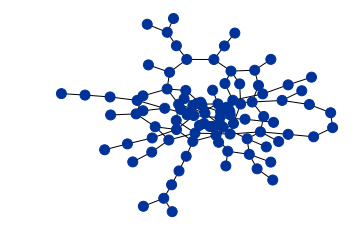

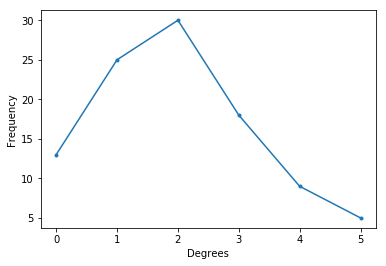

In [4]:
def random_network(n_nodes=7):
    n_edges = n_nodes

    g = Graph()
    for i in range(n_nodes):
        g.add_node(i)
    edges = []
    while len(edges)<n_edges:
        n1 = np.random.randint(low=0, high=n_nodes)
        n2 = np.random.randint(low=0, high=n_nodes)
        if n2<n1:
            n1,n2 = n2,n1

        if (n1,n2) not in edges and n1!=n2:
            g.add_edge(n1,n2)
            edges.append((n1,n2))
    return g
    
#print(g)

g = random_network(100)
plt.figure(figsize=(12,4))
plt.subplot(121)
g.plot()
degrees_random = degrees(g)

array([ 0.,  0., 10.,  4.,  2.,  0.,  0.,  2.,  0.,  1.,  0.,  1.])

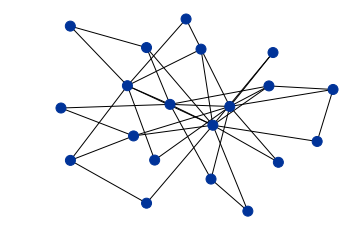

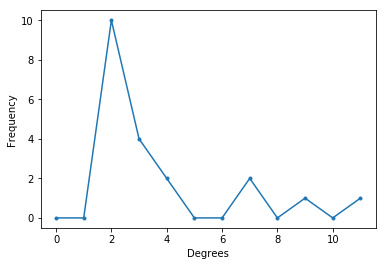

In [5]:
def barabasi(n_nodes = 9):
    """n edges = 2 * n nodes"""
    g = Graph()
    degrees = np.zeros(n_nodes)
    nodes = np.array(range(n_nodes))
    
    for i in range(n_nodes):
        if i == 0:
            g.add_node(0)
        elif i == 1:
            g.add_edge(1,0)
            degrees[0] = 1
            degrees[1] = 1
        else:
            connections = np.random.choice(nodes[:i], size = 2, replace = False, p=degrees[:i]/np.sum(degrees))
            for node in connections:
                g.add_edge(i, node)
                degrees[node] += 1
            degrees[i] = 2
        #print(i, "nodes:", nodes, "degrees:", degrees)
    return g

g = barabasi(20)
plt.figure(figsize=(12,4))
plt.subplot(121)
g.plot()
degrees(g)

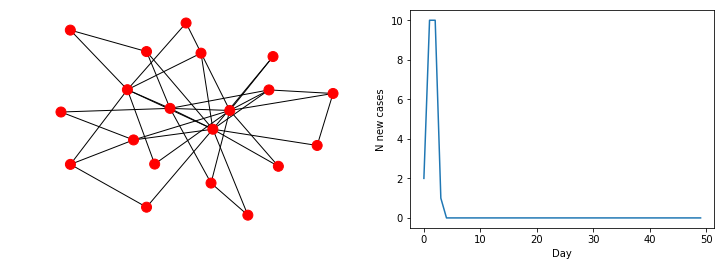

In [6]:
def pandemic(g, prob = 0.5, nsteps = 30, n_nodes = 30):
    for node in g.get_nodes():
        g.val[node] = 0  
        patient_zero = np.random.randint(low = 0, high = n_nodes)
    g.val[patient_zero] = 1             

    history = np.zeros(nsteps)
    for t in range(nsteps):
        newly_infected = []
        for node in g.get_nodes():
            if g.val[node]==1:
                neighbors = g.gdict[node]
                for neighbor in neighbors:
                    if g.val[neighbor]==0 and np.random.uniform()<prob:
                        newly_infected.append(neighbor)
        for node in newly_infected:
            g.val[node] = 1
        history[t] = len(newly_infected)
    return history

history = pandemic(g, prob=0.5, nsteps=50)
plt.figure(figsize=(12,4))
plt.subplot(121)
g.plot()
plt.subplot(122)
plt.plot(history);
plt.xlabel('Day');
plt.ylabel('N new cases');

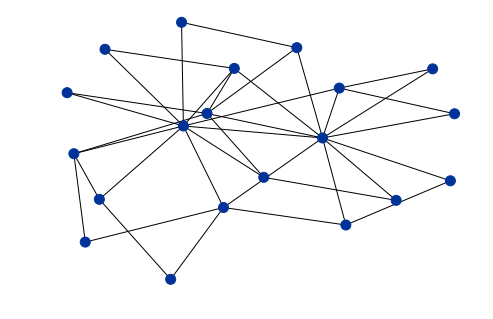

In [9]:
def pandemic(g, prob = 0.5, nsteps = 30, n_nodes = 30):
    for node in g.get_nodes():
        g.val[node] = 0  
        patient_zero = np.random.randint(low = 0, high = n_nodes)
    g.val[patient_zero] = 1             

    history = np.zeros(nsteps)
    for t in range(nsteps):
        newly_infected = []
        for node in g.get_nodes():
            if g.val[node]==1:
                neighbors = g.gdict[node]
                for neighbor in neighbors:
                    if g.val[neighbor]==0 and np.random.uniform()<prob:
                        newly_infected.append(neighbor)
        for node in newly_infected:
            g.val[node] = 1
        history[t] = len(newly_infected)
    return history

g = barabasi(20)
history = pandemic(g, prob = 0.1, nsteps = 2)
g.plot()

Text(0, 0.5, '# new cases')

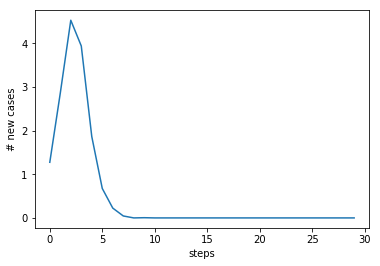

In [10]:
N_STEPS = 30
N_TRIALS = 200
history = np.zeros(shape = (N_STEPS, N_TRIALS))
for i in range(N_TRIALS):
    history[:,i] = pandemic(g, prob = 0.5, nsteps = N_STEPS);
    
plt.plot(np.mean(history, axis = 1))
plt.xlabel("steps")
plt.ylabel("# new cases")